**Kier Yvanne Abot**


**BSCS 3A**

#**1.Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

#**2.Dataset Preparation**

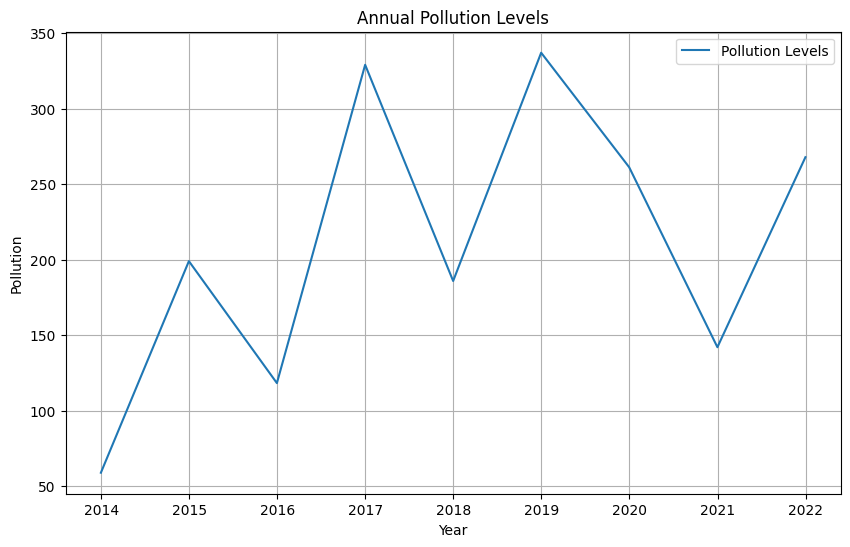

In [4]:
df = pd.read_csv('most-polluted-countries.csv')
years = pd.date_range(start='2013', end='2022', freq='Y')
pollution_levels = np.random.randint(50, 300, len(years)) + np.sin(np.linspace(0, np.pi, len(years))) * 50

# Create DataFrame
df = pd.DataFrame({'Year': years, 'Pollution': pollution_levels})
df.set_index('Year', inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Pollution'], label='Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution')
plt.title('Annual Pollution Levels')
plt.legend()
plt.grid(True)
plt.show()

#**3. Stationarity Testing**

In [5]:
result = adfuller(df['Pollution'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.701961904663053
p-value: 0.004085642671457205
Critical Values: {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}


#**4.. ARIMA Model Identification**

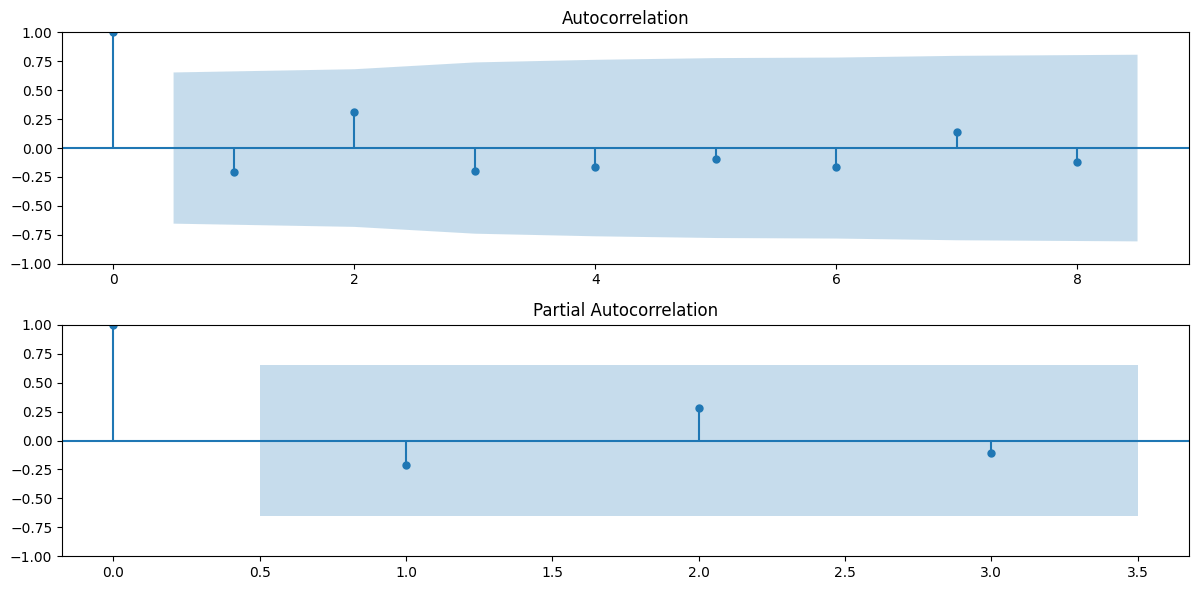

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['Pollution'], ax=plt.gca(), lags=8)
plt.subplot(2, 1, 2)
plot_pacf(df['Pollution'], ax=plt.gca(), lags=3)
plt.tight_layout()
plt.show()

#**5.ARIMA Model Fitting**

In [10]:
model = ARIMA(df['Pollution'], order=(1, 1, 1))
fit_model = model.fit()

# Evaluate model fit
print(fit_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Pollution   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -47.920
Date:                Wed, 27 Mar 2024   AIC                            101.840
Time:                        14:06:29   BIC                            102.078
Sample:                    12-31-2013   HQIC                           100.232
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7014      0.518     -1.353      0.176      -1.717       0.315
ma.L1         -0.0765      1.010     -0.076      0.940      -2.056       1.903
sigma2      8461.0462   4892.551      1.729      0.0

#**6.Forecasting**

In [11]:
forecast = fit_model.forecast(steps=2)
print('Forecast:', forecast)

Forecast: 2022-12-31    177.484252
2023-12-31    240.968425
Freq: A-DEC, Name: predicted_mean, dtype: float64


#**7.Report and Insight**

In [12]:
report = """
Analysis Report

***Stationarity Testing:***
  {}

***ARIMA Model Fitting**
  {}

***Forecasting***
  {}


""".format (result, model,forecast)

print(report)


Analysis Report

***Stationarity Testing:***
  (-3.701961904663053, 0.004085642671457205, 0, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}, 69.16922970930386)

***ARIMA Model Fitting**

***Forecasting***
  2022-12-31    177.484252
2023-12-31    240.968425
Freq: A-DEC, Name: predicted_mean, dtype: float64



